# Prerequisite

Following packages must be installed to run codes below

```bash
$ pip3 install gluonts
```

# References
- [Get Started: A Quick Example](https://ts.gluon.ai)
- [amazon-sagemaker-time-series-prediction-using-gluonts](https://github.com/aws-samples/amazon-sagemaker-time-series-prediction-using-gluonts/blob/master/notebooks/part3/twitter_volume_forecast.ipynb)

In [2]:
from gluonts.dataset import common
from gluonts.model import deepar
from gluonts.mx.trainer import Trainer

import pandas as pd

url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)
data = common.ListDataset([{
    "start": df.index[0],
    "target": df.value[:"2015-04-05 00:00:00"]
}],freq="5min")

/home/ubuntu/.local/lib/python3.6/site-packages/gluonts/json.py:46: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [3]:
trainer = Trainer(epochs=10)

100%|██████████| 50/50 [00:02<00:00, 21.78it/s, epoch=10/10, avg_epoch_loss=3.95]


[49.301254 48.871902 42.29032  43.48064  41.946884 41.27568  38.280373
 40.552887 41.741314 39.505653 42.714554 39.9043  ]


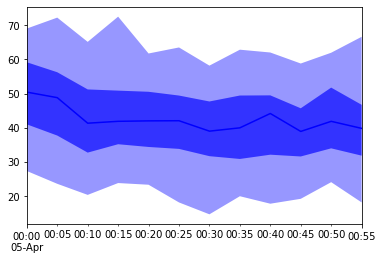

In [4]:
estimator = deepar.DeepAREstimator(
    freq="5min", prediction_length=12, trainer=trainer)
predictor = estimator.train(training_data=data)

prediction = next(predictor.predict(data))
print(prediction.mean)
prediction.plot(output_file='graph.png')